<a href="https://colab.research.google.com/github/rcarrata/deeplearning_tf_examples/blob/master/6_Deep_Learning_Regression_with_Admissions_Data_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Regression with Admissions Data

For this project, you will create a deep learning regression model that predicts the likelihood that a student applying to graduate school will be accepted based on various application factors (such as test scores).

By analyzing the parameters in this graduate admissions dataset, you will use TensorFlow with Keras to create a regression model that can evaluate the chances of an applicant being admitted. You hope this will give you further insight into the graduate admissions world and improve your test prep strategy.

## Exercise Step by Step 

1. If you take a look at admissions_data.csv, you’ll see parameters that admissions officers commonly use to evaluate university applicants. This data is from Kaggle and provides information about 500 applications for various universities and what their chance of admittance is.

 This is a regression problem because the probability of being admitted is a continuous label between 0 and 1.

 Load the csv file into a DataFrame and investigate the rows and columns to get familiarity with the dataset.

 To get more information about each parameter in admissions_data.csv click the hint below.

2. Split it up the data into feature parameters and the labels.

You are creating a model that predicts an applicant’s likelihood of being admitted to a master’s program, so take some time to look at the features of your model and which column you are trying to predict. Also consider if there are any dataset features that should not be included as a predictor.

Make sure all of your variables are numerical.

If there are any categorical variables, be sure to map them to numerical values, using techniques such as one-hot-encoding, so they can be used in a regression analysis.

3. Since you are creating a learning model, you must have a training set and a test set. Remember that this allows you to measure the effectiveness of your model.

 You have created two DataFrames: one for features DataFrame and one for labels. Now, you must split each of these into a training set and a test set.

 If you need a refresher on splitting a train and test set, use scikit-learn’s user guide and any other online resources for help!

 Click the hint below if you need any other guidance.

4. If you look through the admissions_data.csv, you may notice that there are many different scales being used. For example, the GRE Score is out of 340 while the University Rating is out of 5. Can you imagine why this might be a problem when using a regression learning model?

 You should either scale or normalize your data so that all columns/features have equal weight in the learning model.

5. Create a neural network model to perform a regression analysis on the admission data.

 When designing your own neural network model, consider the following:

 * The shape of your input
 * Adding hidden layers as well as how many neurons they have
 * Including activation functions
 * The type of loss function and metrics you use
 * The type of gradient descent optimizer you use
 * Your learning rate

6. It’s time to test out the model you created!

 Fit your model with your training set and test it out with your test set.

 It’s okay if it is not that accurate right now. You can play around with your model and tweak it to increase its accuracy.

7. You have tested out your model. Now is the time to adjust your model’s hyperparameters. You have a lot of choices to make. You can choose:

 * the number of epochs
 * the size of your batch_size
 * to add more hidden layers
 * your type of optimizer and/or activation functions.

 Have fun in the hyperparameter playground. Test things out and see what works and what does not work. See what makes your model optimized between speed and accuracy. You have complete creative power!


9. Using the Matplotlib Library , see if you can plot the model loss per epoch as well as the mean-average error per epoch for both training and validation data. This will give you an insight into how the model performs better over time and can also help you figure out better ways to tune your hyperparameters.

 Because of the way Matplotlib plots are displayed in the learning environment, please use fig.savefig('static/images/my_plots.png') at the end of your graphing code to render the plot in the browser. If you wish to display multiple plots, you can use .subplot() or .add_subplot() methods in the Matplotlib library to depict multiple plots in one figure.

 Use the hint below if you have any struggles with displaying these graphs.

10. Let’s say you wanted to evaluate how strongly the features in admissions.csv predict an applicant’s admission into a graduate program. We can use something called an R-squared value. It is also known as the coefficient of determination; feel free to explore more about it here.

 Basically, we can use this calculation to see how well the features in our regression model make predictions. An R-squared value near close to 1 suggests a well-fit regression model, while a value closer to 0 suggests that the regression model does not fit the data well.

 See if you can apply this to your model after it has been evaluated using a .predict() method on your features_test_set and the r2_score() function on your labels_test_set. Both of these functions are from the scikit-learn library.

In [ ]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive/Colab/Admissions/admissions_data.csv"

root_folder = "/content/drive/My Drive/Colab/"
project_folder = "Admissions/"
csv_file = "admissions_data.csv"

csv_data = root_folder + project_folder + csv_file
print(csv_data)

admissions_data = pd.read_csv(csv_data)

from google.colab.data_table import DataTable
DataTable.max_columns = 60

print("## Dataset Head")
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/My Drive/Colab/Admissions/admissions_data.csv'
/content/drive/My Drive/Colab/Admissions/admissions_data.csv
## Dataset Head


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
print("## Dataset Describe")
dataset.describe()

## Dataset Describe


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Epoch 1/100
36/36 [==============================] - 1s 5ms/step - loss: 0.2921 - mae: 0.4410 - val_loss: 0.0771 - val_mae: 0.2300
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0899 - mae: 0.2439 - val_loss: 0.0394 - val_mae: 0.1770
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0651 - mae: 0.2016 - val_loss: 0.0204 - val_mae: 0.1232
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0404 - mae: 0.1610 - val_loss: 0.0173 - val_mae: 0.1128
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0313 - mae: 0.1403 - val_loss: 0.0183 - val_mae: 0.1165
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0284 - mae: 0.1331 - val_loss: 0.0108 - val_mae: 0.0891
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0205 - mae: 0.1136 - val_loss: 0.0095 - val_mae: 0.0833
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0147 - m

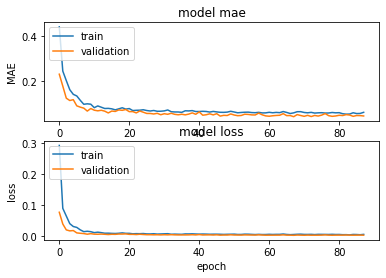

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score


# load admissions data
#admissions_data = pd.read_csv("admissions_data.csv")
#print(admissions_data.head())

#admissions_data.describe()
#print(admissions_data.shape)

# mark predicted values
labels = admissions_data.iloc[:,-1]
#print(labels.describe())

# mark features
features = admissions_data.iloc[:, 1:8]

#split our training and test set
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state = 42)

# standardizing our data by scaling it
sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)

# commented out code for if you want to check out the scaled data

#features_train_scale = pd.DataFrame(features_train_scale, columns = features_train.columns)
#features_test_scale = pd.DataFrame(features_test_scale, columns = features_test.columns)

#print(features_train_scale.describe())
#print(features_test_scale.describe())

# function to design the model
def design_model(feature_data):
	model = Sequential()
	num_features = feature_data.shape[1]
	input = tf.keras.Input(shape=(num_features))
	model.add(input)
	# this model has two hidden layers and two dropout layers
	# relu activation function is used at both hidden layers
	hidden_layer = layers.Dense(16, activation='relu')
	model.add(hidden_layer)
	model.add(layers.Dropout(0.1))
	hidden_layer_2 = layers.Dense(8, activation='relu')
	model.add(hidden_layer_2)
	model.add(layers.Dropout(0.2))
	model.add(layers.Dense(1))

	# using an adam optimizer with a learning rate of 0.005
	# using mean-squared error as our loss function and mean average error as our metric
	opt = keras.optimizers.Adam(learning_rate=0.005)
	model.compile(loss='mse', metrics=['mae'], optimizer=opt)
	return model


# apply the model to the scaled training data
model = design_model(features_train_scale)
#print(model.summary())

# apply early stopping for efficiency
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# fit the model with 100 epochs and a batch size of 8
# validation split at 0.25
history = model.fit(features_train_scale, labels_train.to_numpy(), epochs=100, batch_size=8, verbose=1, validation_split=0.25, callbacks=[es])

# evaluate the model
val_mse, val_mae = model.evaluate(features_test_scale, labels_test.to_numpy(), verbose = 0)

# view the MAE performance
print("MAE: ", val_mae)

# evauate r-squared score
y_pred = model.predict(features_test_scale)

print(r2_score(labels_test,y_pred))

# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()